<a href="https://colab.research.google.com/github/RonnyGuevara/PROJECTS_2022/blob/main/BECK/Beck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lectura de librerías
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Montamos el drive para lectura de la data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BECK.xlsx')
df.head(10) #Esta función devuelve las primeras n filas del objeto se según la posición.

,Pregunta 1 BECK,Pregunta 2 BECK,Pregunta 3 BECK,Pregunta 4 BECK,Pregunta 5 BECK,Pregunta 6 BECK,Pregunta 7 BECK,Pregunta 8 BECK,Pregunta 9 BECK,Pregunta 10 BECK,...,Pregunta 12 BECK,Pregunta 13 BECK,Pregunta 14 BECK,Pregunta 15 BECK,Pregunta 16 BECK,Pregunta 17 BECK,Pregunta 18 BECK,Pregunta 19 BECK,Pregunta 20 BECK,Pregunta 21 BECK
0,No me siento triste.,No me siento especialmente desanimado respecto...,No me siento fracasado.,Las cosas me satisfacen tanto como antes.,Me siento culpable en bastantes ocasiones.,No creo que esté siendo castigado.,No estoy decepcionado de mí mismo.,Me autocritico por mis debilidades o por mis e...,No tengo ningún pensamiento de suicidio.,No lloro más de lo que solía.,...,Estoy menos interesado en los demás que antes.,Tomo decisiones más o menos como siempre he he...,No creo tener peor aspecto que antes.,Me cuesta un esfuerzo extra comenzar a hacer a...,Duermo tan bien como siempre.,No me siento más cansado de lo normal.,Mi apetito no ha disminuido.,Últimamente he perdido poco peso o no he perdi...,No estoy preocupado por mi salud más de lo nor...,No he observado ningún cambio reciente en mi i...
1,No me siento triste.,No me siento especialmente desanimado respecto...,No me siento fracasado.,Las cosas me satisfacen tanto como antes.,No me siento especialmente culpable.,No creo que esté siendo castigado.,No estoy decepcionado de mí mismo.,No me considero peor que cualquier otro.,No tengo ningún pensamiento de suicidio.,No lloro más de lo que solía.,...,No he perdido el interés por los demás.,Tomo decisiones más o menos como siempre he he...,No creo tener peor aspecto que antes.,Trabajo igual que antes.,Duermo tan bien como siempre.,No me siento más cansado de lo normal.,Mi apetito no ha disminuido.,Últimamente he perdido poco peso o no he perdi...,Estoy preocupado por problemas físicos como do...,Estoy mucho menos interesado por el sexo
2,No me siento triste.,No me siento especialmente desanimado respecto...,No me siento fracasado.,Las cosas me satisfacen tanto como antes.,No me siento especialmente culpable.,No creo que esté siendo castigado.,No estoy decepcionado de mí mismo.,No me considero peor que cualquier otro.,No tengo ningún pensamiento de suicidio.,No lloro más de lo que solía.,...,No he perdido el interés por los demás.,Tomo decisiones más o menos como siempre he he...,No creo tener peor aspecto que antes.,Trabajo igual que antes.,Duermo tan bien como siempre.,No me siento más cansado de lo normal.,Mi apetito no ha disminuido.,Últimamente he perdido poco peso o no he perdi...,No estoy preocupado por mi salud más de lo nor...,No he observado ningún cambio reciente en mi i...
3,Me siento triste.,Me siento desanimado respecto al futuro.,Creo que he fracasado más que la mayoría de la...,No disfruto de las cosas tanto como antes.,Me siento culpable en bastantes ocasiones.,Siento que estoy siendo castigado.,Me da vergüenza de mí mismo.,Me autocritico por mis debilidades o por mis e...,No tengo ningún pensamiento de suicidio.,No lloro más de lo que solía.,...,Estoy menos interesado en los demás que antes.,Tomar decisiones me resulta mucho más difícil ...,Creo que se han producido cambios permanentes ...,Me cuesta un esfuerzo extra comenzar a hacer a...,No duermo tan bien como antes.,Me canso más fácilmente que antes.,Mi apetito no ha disminuido.,Últimamente he perdido poco peso o no he perdi...,Estoy preocupado por problemas físicos como do...,Estoy menos interesado por el sexo que antes
4,No me siento triste.,No me siento especialmente desanimado respecto...,No me siento fracasado.,Las cosas me satisfacen tanto como antes.,No me siento especialmente culpable.,No creo que esté siendo castigado.,No estoy decepcionado de mí mismo.,No me considero peor que cualquier otro.,No tengo ningún pensamiento de suicidio.,No lloro más de lo que solía.,...,No he perdido el interés por los demás.,Tomo decisiones más o menos como siempre he he...,No creo tener peor aspecto que antes.,Trabajo igual que antes.

In [4]:
df.columns


Index(['Pregunta 1 BECK', 'Pregunta 2 BECK', 'Pregunta 3 BECK',
       'Pregunta 4 BECK', 'Pregunta 5 BECK', 'Pregunta 6 BECK',
       'Pregunta 7 BECK', 'Pregunta 8 BECK', 'Pregunta 9 BECK',
       'Pregunta 10 BECK', 'Pregunta 11 BECK', 'Pregunta 12 BECK',
       'Pregunta 13 BECK', 'Pregunta 14 BECK', 'Pregunta 15 BECK',
       'Pregunta 16 BECK', 'Pregunta 17 BECK', 'Pregunta 18 BECK',
       'Pregunta 19 BECK', 'Pregunta 20 BECK', 'Pregunta 21 BECK'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [6]:
labelEncoder = LabelEncoder()
df["Pregunta 1 BECK"] = labelEncoder.fit_transform(df["Pregunta 1 BECK"])
df["Pregunta 2 BECK"] = labelEncoder.fit_transform(df["Pregunta 2 BECK"])
df["Pregunta 3 BECK"] = labelEncoder.fit_transform(df["Pregunta 3 BECK"])
df["Pregunta 4 BECK"] = labelEncoder.fit_transform(df["Pregunta 4 BECK"])
df["Pregunta 5 BECK"] = labelEncoder.fit_transform(df["Pregunta 5 BECK"])
df["Pregunta 6 BECK"] = labelEncoder.fit_transform(df["Pregunta 6 BECK"])
df["Pregunta 7 BECK"] = labelEncoder.fit_transform(df["Pregunta 7 BECK"])
df["Pregunta 8 BECK"] = labelEncoder.fit_transform(df["Pregunta 8 BECK"])
df["Pregunta 9 BECK"] = labelEncoder.fit_transform(df["Pregunta 9 BECK"])
df["Pregunta 10 BECK"] = labelEncoder.fit_transform(df["Pregunta 10 BECK"])
df["Pregunta 11 BECK"] = labelEncoder.fit_transform(df["Pregunta 11 BECK"])
df["Pregunta 12 BECK"] = labelEncoder.fit_transform(df["Pregunta 12 BECK"])
df["Pregunta 13 BECK"] = labelEncoder.fit_transform(df["Pregunta 13 BECK"])
df["Pregunta 14 BECK"] = labelEncoder.fit_transform(df["Pregunta 14 BECK"])
df["Pregunta 15 BECK"] = labelEncoder.fit_transform(df["Pregunta 15 BECK"])
df["Pregunta 16 BECK"] = labelEncoder.fit_transform(df["Pregunta 16 BECK"])
df["Pregunta 17 BECK"] = labelEncoder.fit_transform(df["Pregunta 17 BECK"])
df["Pregunta 18 BECK"] = labelEncoder.fit_transform(df["Pregunta 18 BECK"])
df["Pregunta 19 BECK"] = labelEncoder.fit_transform(df["Pregunta 19 BECK"])
df["Pregunta 20 BECK"] = labelEncoder.fit_transform(df["Pregunta 20 BECK"])
df["Pregunta 21 BECK"] = labelEncoder.fit_transform(df["Pregunta 21 BECK"])

In [7]:
df

,Pregunta 1 BECK,Pregunta 2 BECK,Pregunta 3 BECK,Pregunta 4 BECK,Pregunta 5 BECK,Pregunta 6 BECK,Pregunta 7 BECK,Pregunta 8 BECK,Pregunta 9 BECK,Pregunta 10 BECK,...,Pregunta 12 BECK,Pregunta 13 BECK,Pregunta 14 BECK,Pregunta 15 BECK,Pregunta 16 BECK,Pregunta 17 BECK,Pregunta 18 BECK,Pregunta 19 BECK,Pregunta 20 BECK,Pregunta 21 BECK
0,3,1,3,1,1,2,3,1,2,3,...,0,2,3,0,0,3,2,3,3,3
1,3,1,3,1,3,2,3,3,2,3,...,3,2,3,2,0,3,2,3,1,1
2,3,1,3,1,3,2,3,3,2,3,...,3,2,3,2,0,3,2,3,3,3
3,2,0,0,2,1,3,1,1,2,3,...,0,1,0,0,3,2,2,3,1,0
4,3,1,3,1,3,2,3,3,2,3,...,3,2,3,2,0,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3,1,3,1,3,2,3,3,2,3,...,3,2,2,2,0,3,2,3,3,3
94,3,1,3,1,3,2,3,3,2,3,...,3,2,3,2,0,2,2,3,3,3
95,3,0,3,2,3,2,3,3,2,3,...,3,2,3,2,3,3,2,0,3,3
96,3,1,3,2,1,2,3,1,2,3,...,3,2,3,2,0,3,2,3,1,3


In [8]:
df.corr()

,Pregunta 1 BECK,Pregunta 2 BECK,Pregunta 3 BECK,Pregunta 4 BECK,Pregunta 5 BECK,Pregunta 6 BECK,Pregunta 7 BECK,Pregunta 8 BECK,Pregunta 9 BECK,Pregunta 10 BECK,...,Pregunta 12 BECK,Pregunta 13 BECK,Pregunta 14 BECK,Pregunta 15 BECK,Pregunta 16 BECK,Pregunta 17 BECK,Pregunta 18 BECK,Pregunta 19 BECK,Pregunta 20 BECK,Pregunta 21 BECK
Pregunta 1 BECK,1.000000,-0.161087,0.489743,-0.416705,0.486336,-0.183636,0.266620,0.395030,0.408364,0.346336,...,0.334440,0.449109,0.322619,0.257979,-0.217640,0.489176,0.109700,0.179907,0.344860,0.158765
Pregunta 2 BECK,-0.161087,1.000000,-0.026931,-0.121675,-0.150205,-0.062456,-0.163100,-0.012975,-0.017328,-0.084234,...,-0.010302,-0.122957,-0.024373,0.081755,0.060981,-0.035584,-0.061031,-0.117498,-0.068887,0.034342
Pregunta 3 BECK,0.489743,-0.026931,1.000000,-0.320943,0.291286,-0.146205,0.402176,0.198126,0.144256,0.179194,...,0.360087,0.590628,0.326962,0.388468,-0.090870,0.302176,0.085888,-0.096007,0.339077,0.202574
Pregunta 4 BECK,-0.416705,-0.121675,-0.320943,1.000000,-0.256799,0.218092,-0.154610,-0.227337,-0.225772,-0.164180,...,-0.052376,-0.230548,-0.330905,-0.203173,0.212487,-0.393846,-0.292113,-0.024454,-0.244320,-0.252889
Pregunta 5 BECK,0.486336,-0.150205,0.291286,-0.256799,1.000000,0.027491,0.456312,0.497504,0.380191,0.191677,...,0.293536,0.341752,0.229235,0.212593,-0.296177,0.278317,-0.045462,0.248537,0.312545,0.213695
Pregunta 6 BECK,-0.183636,-0.062456,-0.146205,0.218092,0.027491,1.000000,-0.010290,0.087519,-0.011927,0.067709,...,0.244445,0.113827,-0.037326,0.038264,-0.100559,-0.049290,-0.173280,0.088707,-0.109763,-0.112080
Pregunta 7 BECK,0.266620,-0.163100,0.402176,-0.154610,0.456312,-0.010290,1.000000,0.323781,0.178571,0.245671,...,0.152297,0.411071,0.483722,0.192748,-0.195164,0.231321,-0.018588,0.060278,0.264146,0.231307
Pregunta 8 BECK,0.395030,-0.012975,0.198126,-0.227337,0.497504,0.087519,0.323781,1.000000,0.194256,0.126468,...,0.223752,0.327369,0.247616,0.217670,-0.071210,0.186989,0.199554,0.133778,0.289592,0.168433
Pregunta 9 BECK,0.408364,-0.017328,0.144256,-0.225772,0.380191,-0.011927,0.178571,0.194256,1.000000,0.433163,...,0.046820,0.179390,0.197811,0.114907,-0.196803,0.204538,0.094404,0.319740,0.038938,0.179474
Pregunta 10 BECK,0.346336,-0.084234,0.179194,-0.164180,0.191677,0.067709,0.245671,0.126468,0.433163,1.000000,...,0.044468,0.278338,0.205406,0.012793,-0.147787,0.141213,-0.136376,0.217658,0.043941,-0.062469


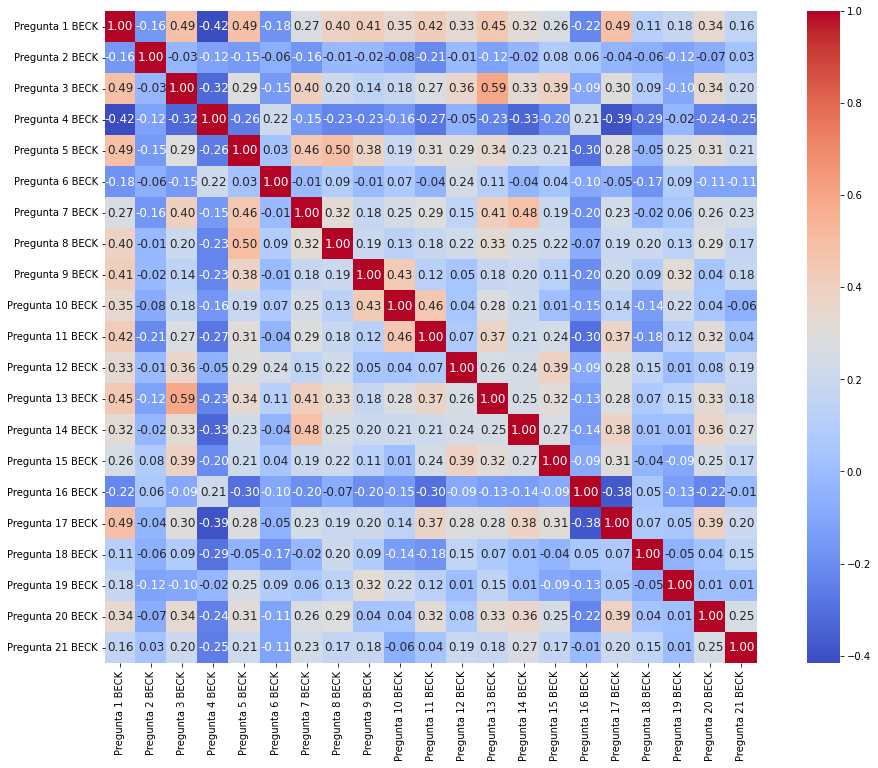

In [9]:
corr = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

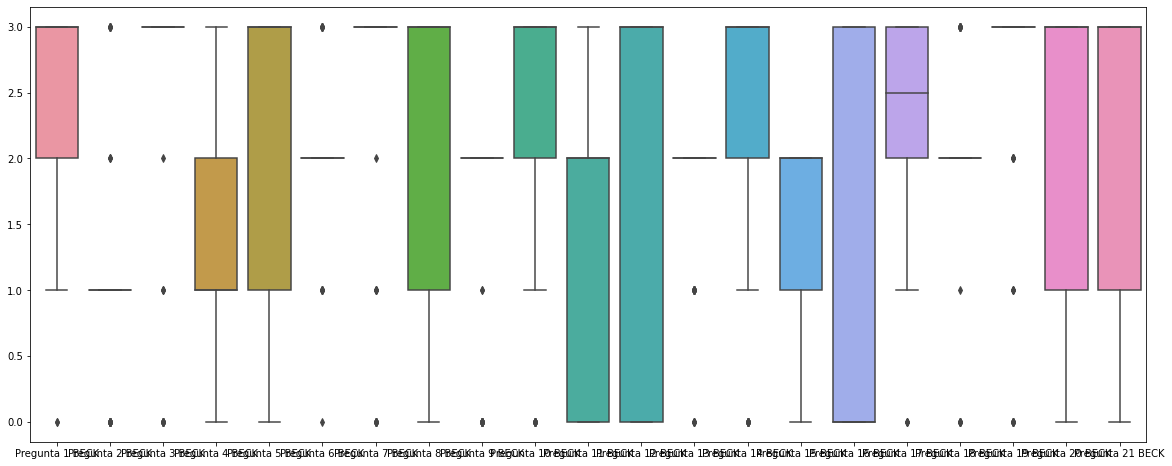

In [10]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
    
    color = "orange"
    text=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

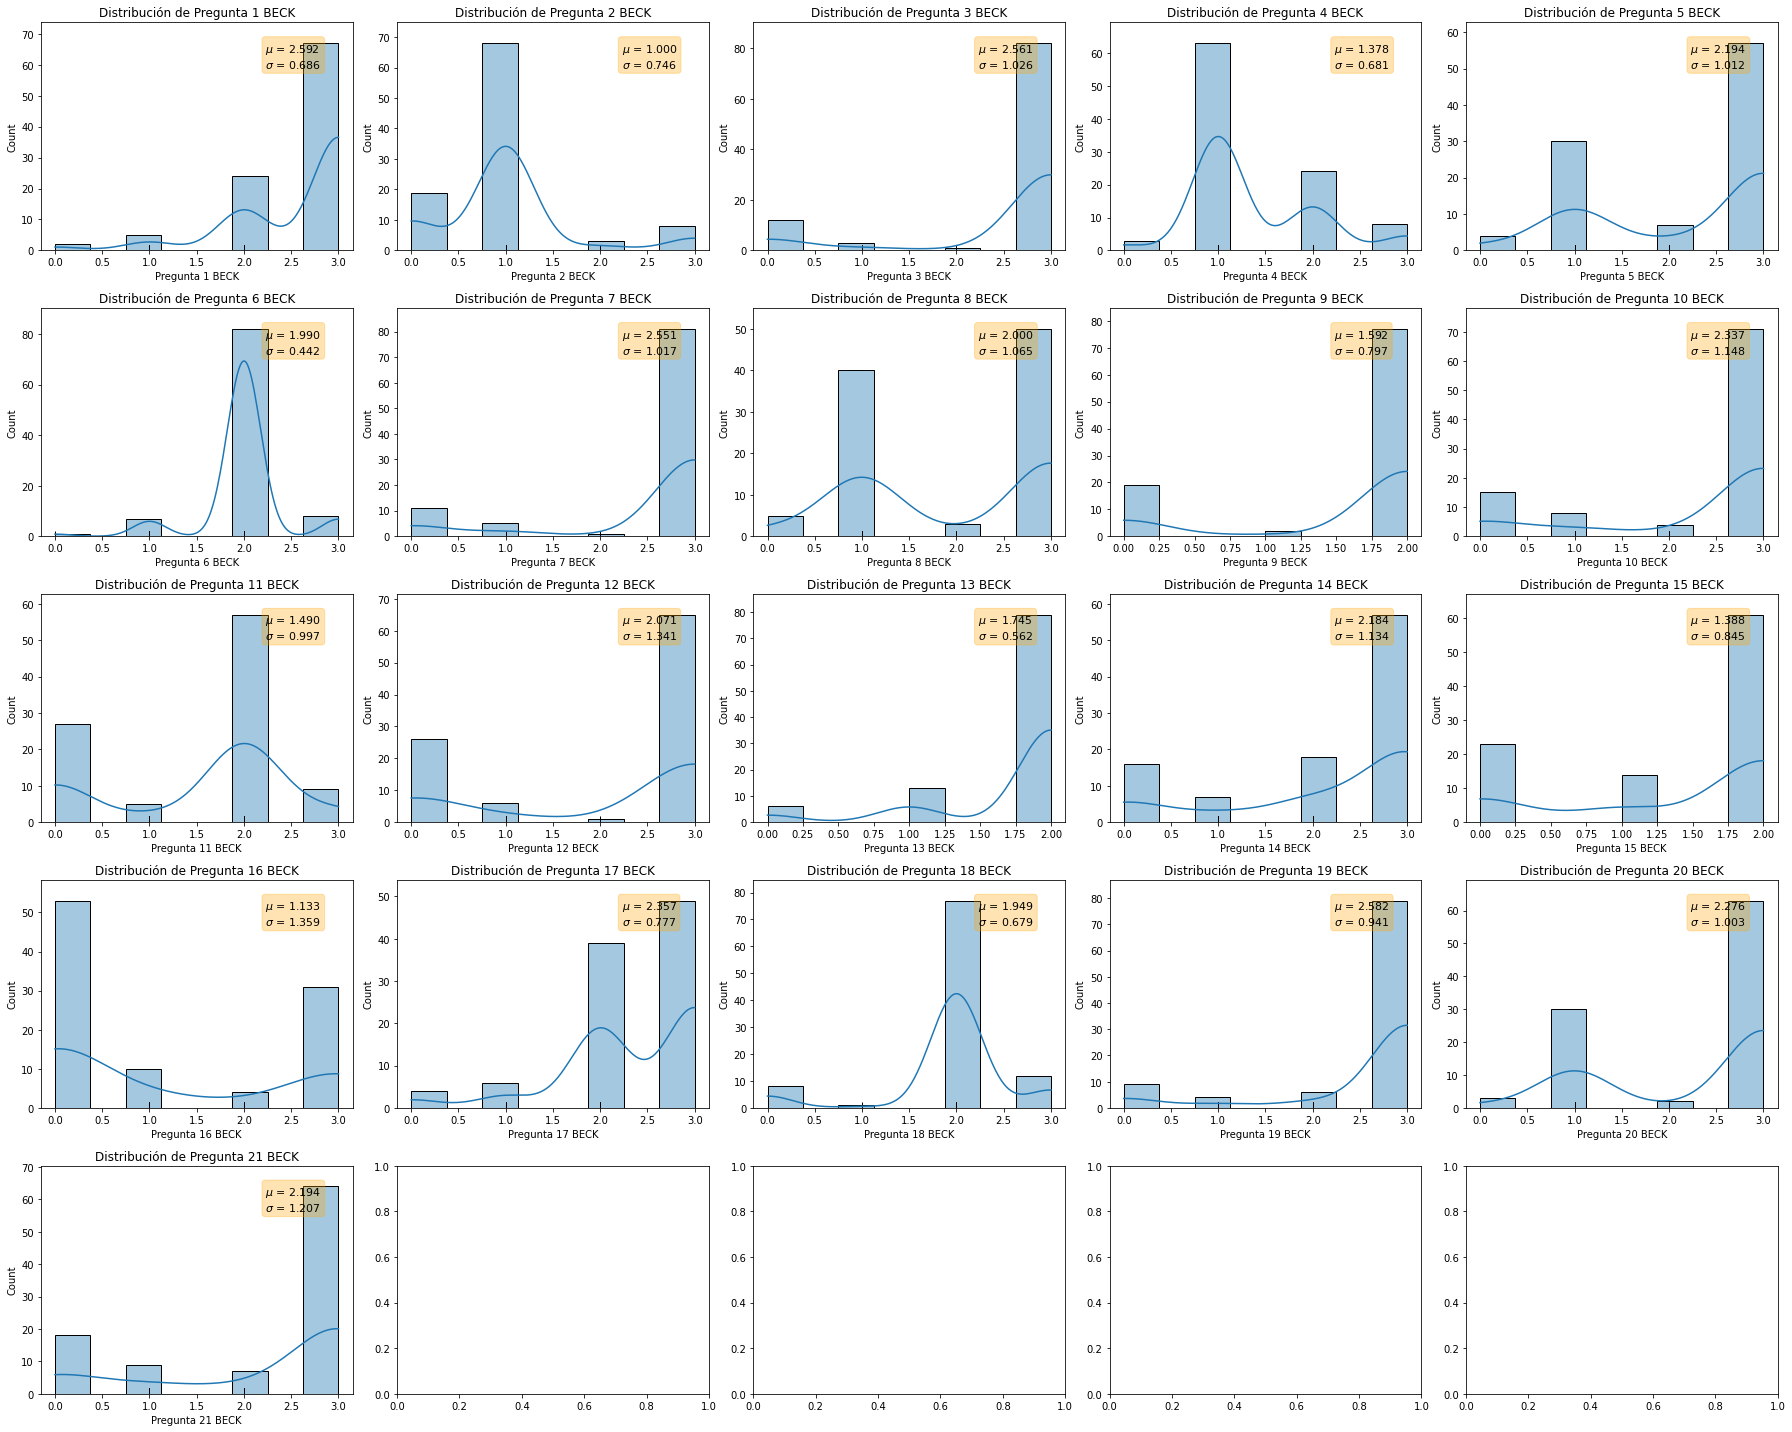

In [12]:
print_dataset(df, 5, 5)

##Normalización
Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de normalizar sus valores.
Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1.

In [36]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

Se asume que no se tiene una previa categorización respecto al BECK por tanto se aplica Cluster: KMeans para agurpar el comportamiento de los individuos
Codo de Jambu

Permite determinar cual es el cluster mas apropiado

In [37]:

from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 300)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

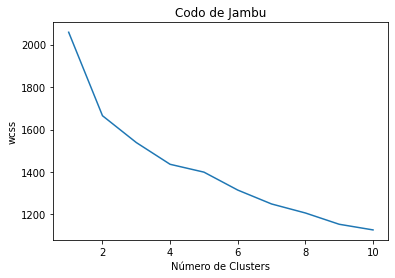

In [38]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("wcss")
plt.show()

Se considera el clúster más apropiado donde la suma de los cuadrados de las distancias deja de caer bruscamente. Para este estudio en particular se tomará el valor de 2.



In [62]:
kmeans = KMeans(n_clusters=5, max_iter = 300, random_state=0).fit(df_std)
kmeans

KMeans(n_clusters=5, random_state=0)

In [63]:
df_std['KMeans_Clusters'] = kmeans.labels_
df_std

,Pregunta 1 BECK,Pregunta 2 BECK,Pregunta 3 BECK,Pregunta 4 BECK,Pregunta 5 BECK,Pregunta 6 BECK,Pregunta 7 BECK,Pregunta 8 BECK,Pregunta 9 BECK,Pregunta 10 BECK,...,Pregunta 13 BECK,Pregunta 14 BECK,Pregunta 15 BECK,Pregunta 16 BECK,Pregunta 17 BECK,Pregunta 18 BECK,Pregunta 19 BECK,Pregunta 20 BECK,Pregunta 21 BECK,KMeans_Clusters
0,0.597881,0.000000,0.429807,-0.556974,-1.185939,0.023181,0.443924,-0.94388,0.514515,0.580612,...,0.456359,0.723693,-1.650699,-0.837432,0.832050,0.075507,0.447001,0.726117,0.671302,0
1,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,0.832050,0.075507,0.447001,-1.278375,-0.994207,4
2,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,0.832050,0.075507,0.447001,0.726117,0.671302,4
3,-0.866928,-1.347151,-2.508871,0.918254,-1.185939,2.294891,-1.533555,-0.94388,0.514515,0.580612,...,-1.332569,-1.935879,-1.650699,1.380631,-0.462250,0.075507,0.447001,-1.278375,-1.826961,2
4,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,-0.462250,0.075507,0.447001,0.726117,0.671302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,-0.162831,0.728250,-0.837432,0.832050,0.075507,0.447001,0.726117,0.671302,4
94,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,-0.462250,0.075507,0.447001,0.726117,0.671302,4
95,0.597881,-1.347151,0.429807,0.918254,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,1.380631,0.832050,0.075507,-2.758323,0.726117,0.671302,4
96,0.597881,0.000000,0.429807,0.918254,-1.185939,0.023181,0.443924,-0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,0.832050,0.075507,0.447001,-1.278375,0.671302,3


In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df_nor = pca.fit_transform(df_std)
pca_df_nor = pd.DataFrame(data = pca_df_nor, columns = ['Componente_1', 'Componente_2'])
pca_BECK = pd.concat([pca_df_nor, df_std[['KMeans_Clusters']]], axis = 1)
pca_BECK
#pca_BECK.to_excel("pca_BECK.xlsx", index = False) Si queremos eliminar el index
pca_BECK.to_excel("pca_BECK.xlsx")

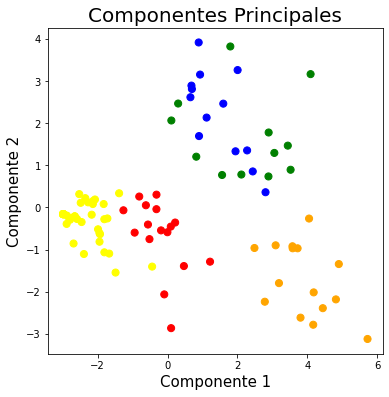

In [70]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange","red", "yellow"])
ax.scatter(x = pca_BECK.Componente_1, y =pca_BECK.Componente_2,
           c=color_theme[pca_BECK.KMeans_Clusters], s = 50)
plt.show()

In [58]:
df_std

,Pregunta 1 BECK,Pregunta 2 BECK,Pregunta 3 BECK,Pregunta 4 BECK,Pregunta 5 BECK,Pregunta 6 BECK,Pregunta 7 BECK,Pregunta 8 BECK,Pregunta 9 BECK,Pregunta 10 BECK,...,Pregunta 13 BECK,Pregunta 14 BECK,Pregunta 15 BECK,Pregunta 16 BECK,Pregunta 17 BECK,Pregunta 18 BECK,Pregunta 19 BECK,Pregunta 20 BECK,Pregunta 21 BECK,KMeans_Clusters
0,0.597881,0.000000,0.429807,-0.556974,-1.185939,0.023181,0.443924,-0.94388,0.514515,0.580612,...,0.456359,0.723693,-1.650699,-0.837432,0.832050,0.075507,0.447001,0.726117,0.671302,1
1,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,0.832050,0.075507,0.447001,-1.278375,-0.994207,1
2,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,0.832050,0.075507,0.447001,0.726117,0.671302,1
3,-0.866928,-1.347151,-2.508871,0.918254,-1.185939,2.294891,-1.533555,-0.94388,0.514515,0.580612,...,-1.332569,-1.935879,-1.650699,1.380631,-0.462250,0.075507,0.447001,-1.278375,-1.826961,0
4,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,-0.462250,0.075507,0.447001,0.726117,0.671302,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,-0.162831,0.728250,-0.837432,0.832050,0.075507,0.447001,0.726117,0.671302,1
94,0.597881,0.000000,0.429807,-0.556974,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,-0.462250,0.075507,0.447001,0.726117,0.671302,1
95,0.597881,-1.347151,0.429807,0.918254,0.800763,0.023181,0.443924,0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,1.380631,0.832050,0.075507,-2.758323,0.726117,0.671302,1
96,0.597881,0.000000,0.429807,0.918254,-1.185939,0.023181,0.443924,-0.94388,0.514515,0.580612,...,0.456359,0.723693,0.728250,-0.837432,0.832050,0.075507,0.447001,-1.278375,0.671302,1


In [49]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(df_std.T))

NumPy covariance matrix: 
[[ 1.01030928 -0.16274792  0.49479227 -0.42100119  0.49135001 -0.18552908
   0.26936886  0.39910211  0.41257374  0.34990629  0.41991584  0.33788808
   0.45373903  0.32594486  0.26063815 -0.21988373  0.49421922  0.11083088
   0.18176193  0.34841492  0.16040212  0.31404176]
 [-0.16274792  1.01030928 -0.02720853 -0.12292912 -0.15175389 -0.0630997
  -0.16478116 -0.01310875 -0.01750686 -0.08510225 -0.2099462  -0.01040782
  -0.12422457 -0.02462436  0.08259801  0.06160958 -0.03595088 -0.06166049
  -0.11870938 -0.06959673  0.03469625 -0.04166445]
 [ 0.49479227 -0.02720853  1.01030928 -0.32425217  0.29428863 -0.14771179
   0.40632166  0.20016816  0.14574364  0.1810418   0.27540942  0.36379887
   0.5967174   0.33033289  0.39247266 -0.09180631  0.30529087  0.08677337
  -0.09699726  0.34257275  0.20466245  0.26287143]
 [-0.42100119 -0.12292912 -0.32425217  1.01030928 -0.25944669  0.22034044
  -0.15620358 -0.22968046 -0.22809917 -0.16587293 -0.27776442 -0.05291612
  -0.232

In [50]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(df_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.26918069e-01  3.85968468e-02  1.51274729e-01 -3.78277706e-02
  -9.19183787e-02 -6.58149261e-03  1.46418044e-01  2.43948841e-01
  -2.58158009e-01 -6.43933867e-01 -3.68378635e-02  6.70574455e-02
  -2.89470982e-01  1.00111047e-01 -1.63342264e-01 -3.02099536e-02
   1.81718959e-01  1.76304451e-01  1.59819358e-01  1.00137065e-01
   2.50056602e-01 -8.43573877e-02]
 [ 5.94882733e-02 -2.33161215e-01  6.99250016e-02  8.99295810e-03
  -5.84211886e-03  5.22256503e-01  2.63204981e-01 -4.22135569e-01
  -1.23585735e-01 -1.19192307e-01  2.84329921e-02  1.83588483e-01
   1.15335144e-01  3.57386535e-01  1.77655296e-01 -1.06938623e-01
  -2.16826927e-01 -9.67714969e-02 -1.62916324e-01  1.66657335e-01
   1.57781548e-01 -1.82365750e-01]
 [-2.78731074e-01 -2.13255668e-01 -1.26806062e-01  1.13604488e-01
  -7.10060396e-02 -1.77115386e-01  3.31408063e-01  8.36317810e-02
  -1.98850123e-01  3.01816964e-01  5.40818738e-01 -2.06727265e-01
  -5.07121586e-02  2.61427022e-03 -8.43168693e-02  1.48373

In [53]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
5.488617609769946
1.9141133246713034
1.5486719410468948
1.4056420958624305
1.2032369292399474
1.1468384289845464
1.0918194745964918
0.9166166308868672
0.8489543600095412
0.7722595255417006
0.7465586218007192
0.6842904541965764
0.6172708249739118
0.6043488282006039
0.5127005707170574
0.47005554104997954
0.38387870427645904
0.30396289616916156
0.2811111059691651
0.256390571500368
0.17991515611919912
0.031225259876867757


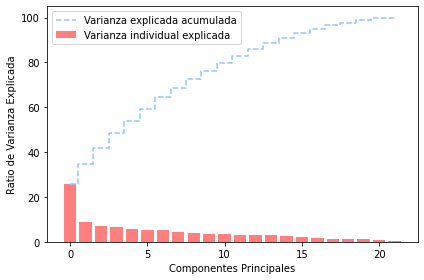

In [57]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(22), var_exp, alpha=0.5, align='center',label='Varianza individual explicada', color='red')
    plt.step(range(22), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [29]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(21,1),
                      eig_pairs[1][1].reshape(21,1)))

print('Matriz W:\n', matrix_w)

Y = df_std.dot(matrix_w)

Matriz W:
 [[ 0.33046297 -0.03935728]
 [-0.06068082  0.23369847]
 [ 0.28195026  0.2126901 ]
 [-0.23135557 -0.18996967]
 [ 0.28860808 -0.1538704 ]
 [-0.02021452 -0.24333905]
 [ 0.25955171 -0.04178085]
 [ 0.23184781  0.02026647]
 [ 0.19361485 -0.25046302]
 [ 0.17978383 -0.40657175]
 [ 0.24828091 -0.23781469]
 [ 0.18554882  0.15929691]
 [ 0.28699112 -0.01630604]
 [ 0.25307647  0.12349674]
 [ 0.20735609  0.2224272 ]
 [-0.16655161  0.19740745]
 [ 0.27286429  0.08037722]
 [ 0.04616288  0.31482807]
 [ 0.08392983 -0.40354338]
 [ 0.24026347  0.1436684 ]
 [ 0.15774026  0.27290017]]


In [14]:
from sklearn.preprocessing import normalize

def normalizacion(x):
    x = x/x.max()
    return x

def estandarizacion(x):
    x_mean= x.mean()
    x_std= x.std()
    
    x = (x-x_mean)/x_std
    return x

Aplicando normalización: 


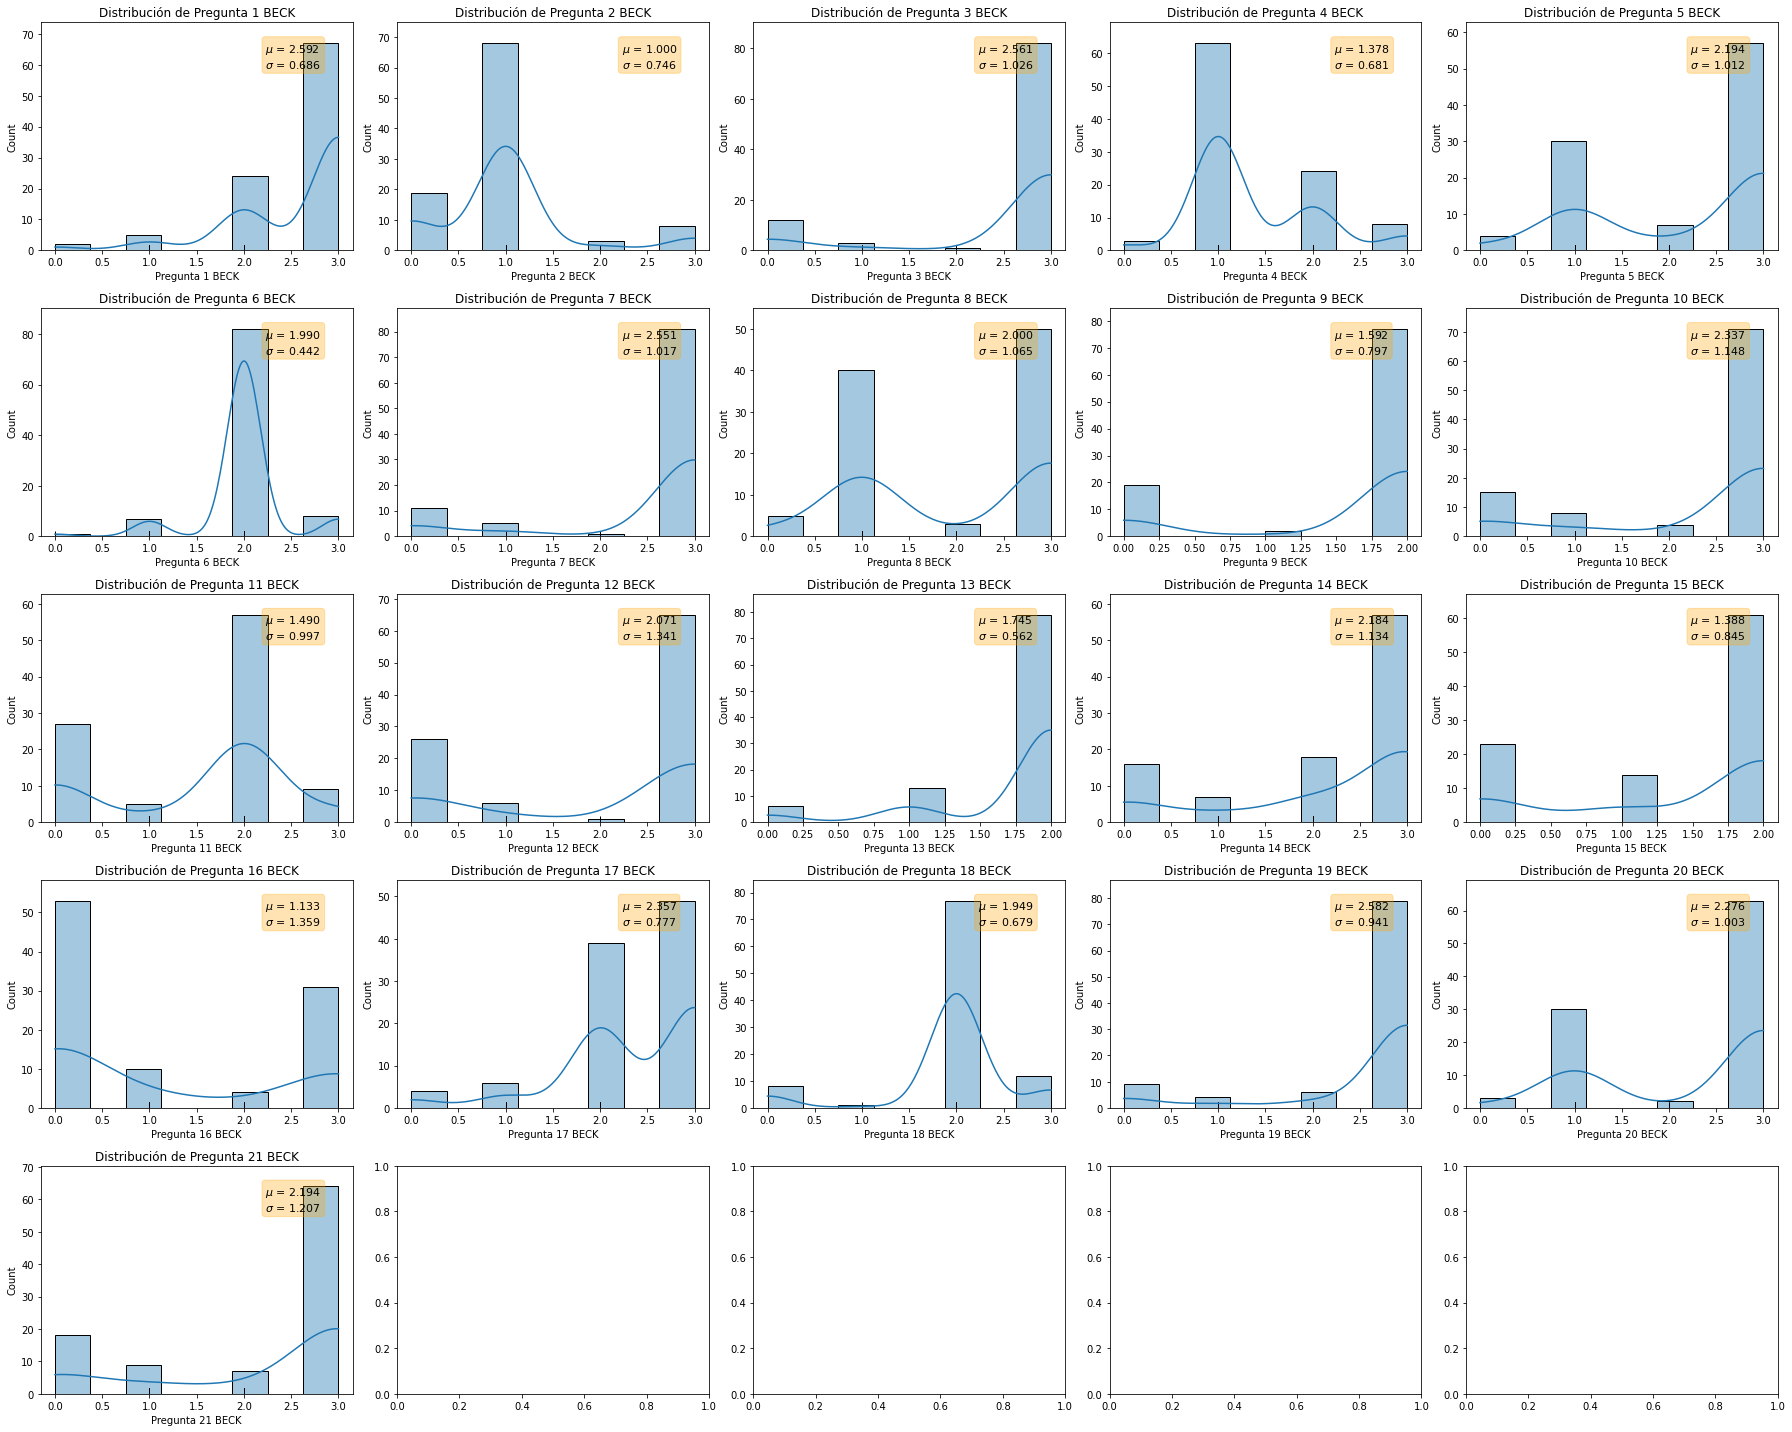

In [15]:
df_n = pd.DataFrame()
for col in df.columns:
    df_n[col] = normalizacion(df[col])
print("Aplicando normalización: ")
print_dataset(df, 5, 5)

##PCA
Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información

In [15]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [16]:
df_pca = make_pipeline(StandardScaler(), PCA())
df_pca.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = df_pca.named_steps['pca']

In [17]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10','PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21']
)

,Pregunta 1 BECK,Pregunta 2 BECK,Pregunta 3 BECK,Pregunta 4 BECK,Pregunta 5 BECK,Pregunta 6 BECK,Pregunta 7 BECK,Pregunta 8 BECK,Pregunta 9 BECK,Pregunta 10 BECK,...,Pregunta 12 BECK,Pregunta 13 BECK,Pregunta 14 BECK,Pregunta 15 BECK,Pregunta 16 BECK,Pregunta 17 BECK,Pregunta 18 BECK,Pregunta 19 BECK,Pregunta 20 BECK,Pregunta 21 BECK
PC1,-0.330463,0.060681,-0.281950,0.231356,-0.288608,0.020215,-0.259552,-0.231848,-0.193615,-0.179784,...,-0.185549,-0.286991,-0.253076,-0.207356,0.166552,-0.272864,-0.046163,-0.083930,-0.240263,-0.157740
PC2,-0.039357,0.233698,0.212690,-0.189970,-0.153870,-0.243339,-0.041781,0.020266,-0.250463,-0.406572,...,0.159297,-0.016306,0.123497,0.222427,0.197407,0.080377,0.314828,-0.403543,0.143668,0.272900
PC3,-0.152273,-0.068851,0.127417,0.382787,0.029553,0.518110,0.129796,0.043090,-0.299697,-0.105318,...,0.398558,0.193171,0.025257,0.307054,0.038658,-0.062792,-0.300434,-0.155124,-0.006754,-0.097125
PC4,-0.035605,0.006468,0.112063,-0.060482,-0.220503,-0.237169,0.023445,-0.361119,-0.288897,0.099383,...,-0.289114,-0.020993,0.095184,0.068235,-0.184712,0.191746,-0.396147,-0.299638,0.228575,-0.183065
PC5,-0.006155,0.524134,-0.175669,-0.198445,-0.044770,0.244720,-0.337081,-0.105742,0.189999,0.009303,...,0.224413,-0.218965,-0.012900,0.238973,-0.381976,0.315181,-0.108325,0.053190,-0.113592,-0.040435
PC6,-0.152600,-0.254241,-0.338352,0.052672,0.216546,0.104652,0.106784,0.138837,-0.205921,-0.426667,...,-0.104742,-0.222861,0.077861,-0.169975,-0.415797,0.195760,0.016779,0.098017,0.356557,0.191074
PC7,0.241041,-0.425949,0.077111,-0.057725,-0.100793,0.022883,-0.356427,-0.066472,-0.173205,-0.088724,...,0.230088,0.100380,-0.361550,-0.010868,-0.162290,0.201294,0.405773,-0.035239,-0.039872,-0.349815
PC8,0.099838,0.356237,0.000290,-0.019659,0.274953,-0.139986,-0.195809,0.469119,-0.175538,-0.165408,...,-0.205062,0.112160,-0.404289,0.131665,0.103157,-0.166335,-0.181441,0.097521,0.248034,-0.242481
PC9,0.163296,-0.177642,0.085146,0.260266,0.116215,-0.309067,-0.228927,-0.361141,0.151394,-0.218885,...,0.150702,-0.047093,-0.213322,0.231388,0.135083,0.058646,-0.319846,0.320066,0.055075,0.387881
PC10,0.177712,-0.097963,0.004806,0.137481,0.380848,-0.335273,0.212595,0.092072,0.141391,-0.062689,...,0.169197,-0.432322,0.025617,0.080109,-0.130988,-0.031501,-0.118156,-0.391999,-0.291074,-0.312246


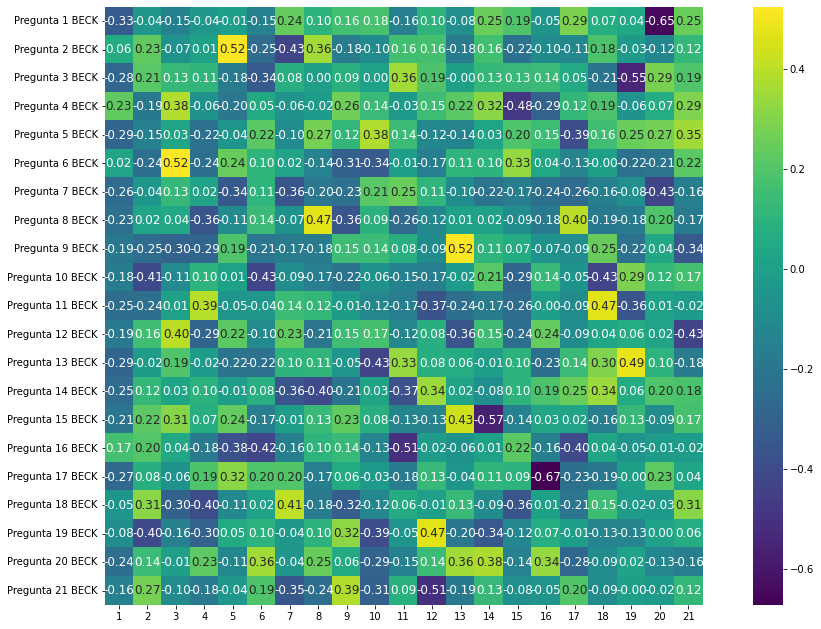

In [18]:
componentes = modelo_pca.components_
plt.figure(figsize=(18, 11))
sns.heatmap(componentes.T, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= np.arange(modelo_pca.n_components_) + 1, yticklabels= df.columns,
           cmap= 'viridis')

Porcentaje de varianza explicada por cada componente
[0.25188198 0.09020281 0.07297529 0.06615615 0.05671044 0.05390712
 0.0514507  0.04319577 0.04001319 0.03639641 0.03513324 0.03224627
 0.02903232 0.02848098 0.0240396  0.02205778 0.01808207 0.01432092
 0.01317799 0.01207132 0.00846764]


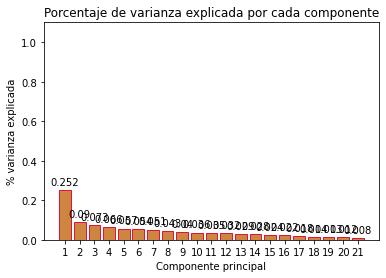

In [19]:
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x = np.arange(modelo_pca.n_components_) + 1, height = modelo_pca.explained_variance_ratio_, color = 'peru', edgecolor  = 'crimson', label='Varianza individual explicada')

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 3)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza explicada');